# COVID Test/Cases/Death - National - Daily: 8/30/2020

In [123]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine
from dotenv import load_dotenv

%matplotlib inline

load_dotenv()


conn = create_engine(os.getenv("HEROKU_POSTGRESQL_BROWN_URL"))
full_table = pd.read_sql_query('''SELECT * FROM sample;''', conn)
full_table




Python-dotenv could not parse statement starting at line 1


,index,Unnamed: 0,year,month,day,countrycode,test_rate,new_test_rate,case_rate,new_case_rate,death_rate,new_death_rate
0,0,0,2020,1,21,1000,.,.,0.000305,.,0.0,.
1,1,1,2020,1,22,1000,0,.,0.000305,.,0.0,.
2,2,2,2020,1,23,1000,0,.,0.000305,.,0.0,.
3,3,3,2020,1,24,1000,0,.,0.000609,.,0.0,.
4,4,4,2020,1,25,1000,0,.,0.000914,.,0.0,.
...,...,...,...,...,...,...,...,...,...,...,...,...
218,218,218,2020,8,26,1000,22438,208,1768.000000,12.8,53.5,.281
219,219,219,2020,8,27,1000,22663,211,1781.000000,12.7,53.8,.285
220,220,220,2020,8,28,1000,22898,212,1795.000000,12.6,54.1,.278
221,221,221,2020,8,29,1000,23130,212,1809.000000,12.6,54.4,.275


In [165]:
april_data = pd.read_sql_query('''SELECT month, day, new_test_rate, new_case_rate, new_death_rate FROM sample where month = '4' ''', conn)
april_data['new_test_rate']=april_data['new_test_rate'].astype(float)
april_data['new_test_rate']=april_data['new_test_rate'].astype(int)
april_data['new_case_rate']=april_data['new_case_rate'].astype(float)
april_data['new_case_rate']=april_data['new_case_rate'].astype(int)
april_data['new_death_rate']=april_data['new_death_rate'].astype(float)


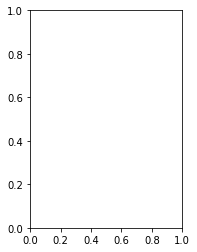

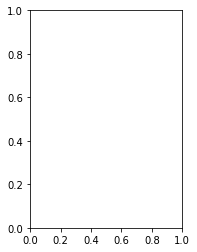

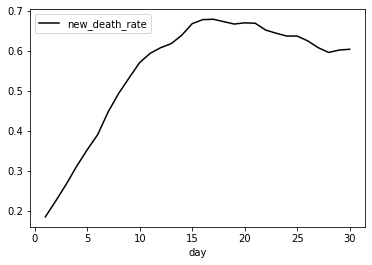

In [209]:
ntr = april_data.plot(kind='line',  x='day', y='new_test_rate', color='blue')
ncr = april_data.plot(kind='line',  x='day', y='new_case_rate', color='red')
ndr = april_data.plot(kind='line',  x='day', y='new_death_rate', color='black')

plt.show()

# End of output